In [3]:
def read_file_text(filename, encoding='utf-8'):
    text = ''
    with open(filename, 'r', encoding=encoding) as f:
        try:
            text = f.read()
        except UnicodeDecodeError:
            logger.warning('Can\'t read file {0}. Bad encoding.'
                           .format(filename))
    return text

In [4]:
text = read_file_text('../bbc/cricket/007.txt')

In [5]:
text

'Kaif absence wrong - Azharuddin\n\nIndia were wrong to leave Mohammad Kaif out of their squad for the first Test against Pakistan, according to former captain Mohammad Azharuddin.\n\nAzharuddin, serving a life ban for match-fixing, feels the middle-order batsman deserves another chance. "Kaif batted very well against Australia on a tough wicket," Azharuddin told BBC Sport. "He\'s got a lot of talent and I am sure he cannot be held back. His omission is not good for his confidence." Kaif scored two fifties in last year\'s home series loss to the Aussies, while Yuvraj Singh failed badly against the same opponents yet was given a squad berth for the Mohali Test starting on 8 March.\n\nAzharuddin reckons Vangipurappu Laxman should bat at first drop despite struggling for form. "Laxman has always played well when he has gone as number three," he said. "Lower down the order, a lot of pressure is on him and if I were the captain, I would have played him at number three." As well as spinners 

In [6]:
from itertools import combinations
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.stem.snowball import RussianStemmer, EnglishStemmer
import networkx as nx
import matplotlib.pyplot as plt

### similarity
\begin{equation}
\frac{|sentence1 \cap sentence2|}{|sentence1 \cup sentence2|}
\end{equation}

In [7]:
def similarity(s1, s2):
    if not len(s1) or not len(s2):
        return 0.0
    return len(s1.intersection(s2)) / (1.0 * (len(s1) + len(s2)))

In [26]:
def textrank(text):
    """
    Returns
    list of sorted tuples by pagerank for sentences
    [(number_of_sentence, pagerank, sentence), ...]
    """
    sentences = sent_tokenize(text)
    for i, s in enumerate(sentences):
        lines = s.splitlines()
        [lines.pop(j) for j, l in enumerate(lines) if len(l) < 1]
        sentences.pop(i)
        sentences.extend(lines)

    tokenizer = RegexpTokenizer(r'\w+')
    # lmtzr = RussianStemmer()
    lmtzr = EnglishStemmer()
    # tokenize words and find unique stems for them
    stem_words_for_sentence = [set(lmtzr.stem(word)
                                   for word in tokenizer.tokenize(sentence.lower()))
                               for sentence in sentences]
    print(stem_words_for_sentence)
    
    pair_sentences = combinations(range(len(sentences)), 2)
    scores = [(i, j, similarity(stem_words_for_sentence[i], stem_words_for_sentence[j]))
              for i, j in pair_sentences]
    print(scores)
    # filter scores with existing similarity
    scores = filter(lambda x: x[2], scores)
    
    g = nx.Graph()
    # graph (u,v,w) - (sentence1 idx, sentence2 idx, similarity)
    g.add_weighted_edges_from(scores)
    pr = nx.pagerank(g)
    print()
    print(pr)
    
    my_sorted = sorted(((i, pr[i], s) for i, s in enumerate(sentences) if i in pr),
                       key=lambda x: pr[x[0]],
                       reverse=True)

    return my_sorted, g

def extract(text, n=5):
    tr = textrank(text)
    top_n = sorted(tr[:n])
    return ' '.join(x[2] for x in top_n)

In [27]:
s, g = textrank(text)

[{'order', 'deserv', 'anoth', 'fix', 'for', 'match', 'azharuddin', 'chanc', 'a', 'feel', 'batsman', 'the', 'middl', 'serv', 'life', 'ban'}, {'s', 'am', 'cannot', 'back', 'a', 'be', 'held', 'of', 'he', 'i', 'sure', 'lot', 'got', 'and', 'talent'}, {'s', 'was', 'given', 'kaif', 'on', 'yuvraj', 'mohali', 'loss', 'oppon', 'score', 'home', '8', 'berth', 'year', 'squad', 'to', 'singh', 'fail', 'in', 'last', 'start', 'bad', 'two', 'against', 'a', 'seri', 'same', 'yet', 'fifti', 'while', 'aussi', 'for', 'test', 'the', 'march'}, {'said', 'well', 'gone', 'three', 'alway', 'laxman', 'number', 'when', 'he', 'play', 'as', 'has'}, {'spinner', 'well', 'pacemen', 'india', 'choos', 'squad', 'harbhajan', 'to', 'singh', 'zaheer', '14', 'in', 'khan', 'pathan', 'lakshmipathi', 'nehra', 'ashish', 'anil', 'kumbl', 'man', 'as', 'and', 'irfan', 'from', 'after', 'four', 'name', 'balaji', 'the', 'have'}, {'s', 'minus', 'on', 'monday', 'ahead', 'arriv', 'akhtar', 'india', 'xi', 'their', 'pakistan', 'to', 'shoaib',

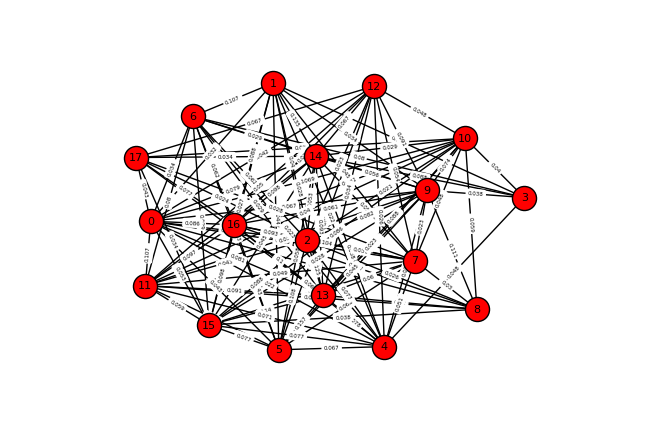

In [48]:
# pos=nx.get_node_attributes(g, 'pos')
pos=nx.spring_layout(g, scale=20)
nx.draw(g, pos)
w_labels = nx.get_edge_attributes(g, 'weight')
w_labels = dict((node, round(weight, 3)) for node, weight in w_labels.items())
# print(w_labels)
# get_node_attributes
nx.draw_networkx_labels(g, pos, font_size=8)
nx.draw_networkx_edge_labels(g, pos, edge_labels=w_labels, font_size=4)
plt.show()

In [11]:
s

[(16,
  0.08647958989445059,
  '"Shoaib Akhtar\'s absence in the Pakistani side is not going to make much of a difference," Azharuddin opined.'),
 (13,
  0.08512616452128657,
  'India were wrong to leave Mohammad Kaif out of their squad for the first Test against Pakistan, according to former captain Mohammad Azharuddin.'),
 (14,
  0.06724909776091878,
  '"Lower down the order, a lot of pressure is on him and if I were the captain, I would have played him at number three."'),
 (0,
  0.06550170420149001,
  'Azharuddin, serving a life ban for match-fixing, feels the middle-order batsman deserves another chance.'),
 (15,
  0.06257175925607966,
  'In 99 Tests for India from 1984 to 2000, Azharuddin scored 6,215 runs at an average of 45 with 22 centuries.'),
 (2,
  0.06237517752777349,
  "Kaif scored two fifties in last year's home series loss to the Aussies, while Yuvraj Singh failed badly against the same opponents yet was given a squad berth for the Mohali Test starting on 8 March."),
 (